In [37]:
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from IPython.display import IFrame, display

In [9]:
file = 'Lectures/Cuadratura_Gaussiana.pdf'
#IFrame(file, width=600, height=400)

In [61]:
deg = 30
x, w = np.polynomial.legendre.leggauss(deg)
print(x)
print(w)

[-0.99689348 -0.98366812 -0.96002186 -0.92620005 -0.88256054 -0.82956576
 -0.76777743 -0.69785049 -0.62052618 -0.53662415 -0.44703377 -0.35270473
 -0.25463693 -0.15386991 -0.05147184  0.05147184  0.15386991  0.25463693
  0.35270473  0.44703377  0.53662415  0.62052618  0.69785049  0.76777743
  0.82956576  0.88256054  0.92620005  0.96002186  0.98366812  0.99689348]
[0.00796819 0.01846647 0.02878471 0.03879919 0.04840267 0.05749316
 0.06597423 0.07375597 0.0807559  0.08689979 0.09212252 0.09636874
 0.09959342 0.10176239 0.10285265 0.10285265 0.10176239 0.09959342
 0.09636874 0.09212252 0.08689979 0.0807559  0.07375597 0.06597423
 0.05749316 0.04840267 0.03879919 0.02878471 0.01846647 0.00796819]


In [26]:
a = 0
b = 0.5*np.pi

f = lambda x : np.cos(x)
print(f(0.))

1.0


In [27]:
t = 0.5*( (b-a)*x + a + b )
Integral = 0.5*(b-a)*sum( w*f(t))

In [28]:
print(Integral)

0.9999999999999535


In [29]:
import sympy as sym

In [30]:
x = sym.Symbol('x', real=True)
funcion = sym.sqrt(x**2+1)
dfuncion = sym.diff(funcion,x)
d2funcion = sym.diff(dfuncion,x)

In [31]:
print(funcion, dfuncion, d2funcion)

(sqrt(x**2 + 1), x/sqrt(x**2 + 1), -x**2/(x**2 + 1)**(3/2) + 1/sqrt(x**2 + 1))


In [33]:
# Convertir en numerico

fn = sym.lambdify([x], funcion, 'numpy')
dfn = sym.lambdify([x], dfuncion, 'numpy')
d2fn = sym.lambdify([x], d2funcion, 'numpy')

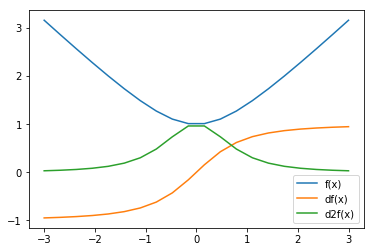

In [36]:
x = np.linspace(-3,3,20)
plt.plot(x,fn(x),x,dfn(x),x,d2fn(x))
plt.legend(['f(x)','df(x)','d2f(x)'])
plt.show()

In [38]:
def CreateLegendPoly(n):
    x = sym.Symbol('x', real=True)
    y = sym.Symbol('y', real=True)
    
    y = (x**2-1)**n
    poly = sym.diff(y,x,n)/( 2**n * math.factorial(n) )
    
    return poly

In [45]:
poly2 = CreateLegendPoly(1)

In [46]:
print(poly2)

x


x
(3*x**2 - 1)/2
x*(5*x**2 - 3)/2
(8*x**4 + 24*x**2*(x**2 - 1) + 3*(x**2 - 1)**2)/8
x*(8*x**4 + 40*x**2*(x**2 - 1) + 15*(x**2 - 1)**2)/8
(16*x**6 + 120*x**4*(x**2 - 1) + 90*x**2*(x**2 - 1)**2 + 5*(x**2 - 1)**3)/16
x*(16*x**6 + 168*x**4*(x**2 - 1) + 210*x**2*(x**2 - 1)**2 + 35*(x**2 - 1)**3)/16
(128*x**8 + 1792*x**6*(x**2 - 1) + 3360*x**4*(x**2 - 1)**2 + 1120*x**2*(x**2 - 1)**3 + 35*(x**2 - 1)**4)/128
x*(128*x**8 + 2304*x**6*(x**2 - 1) + 6048*x**4*(x**2 - 1)**2 + 3360*x**2*(x**2 - 1)**3 + 315*(x**2 - 1)**4)/128


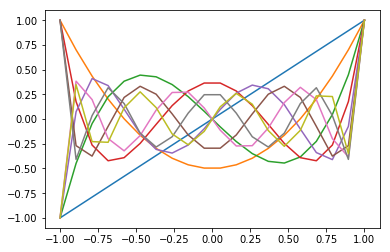

In [60]:


for i in range(1,10):
    pnl = CreateLegendPoly(i)
    x = sym.Symbol('x', real=True)
    xi = np.linspace(-1,1,20)
    print(pnl)
    pn = sym.lambdify([x], pnl, 'numpy')
    plt.plot(xi,pn(xi))